In [1]:
import numpy as np
import numpy.polynomial.laguerre as geek
import numba as nb
import matplotlib.pyplot as plt
import ODESolve as ODE
import ODESolve_slow as ODEslow
import derivatives as der

In [2]:
N=100
Emax= 10
dm2= 2.5*10**-15
th= .5*np.arcsin(.8)
T= .1                   # T= (k/2650.89)^.25
cT= 0

Eval= np.linspace(Emax/N, Emax, N)


ym0= np.zeros((N,4))
for i in range(len(ym0)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0[i,:]= [p0,0,0,1]
    
    

ym0_bar= np.zeros((N,4))
for i in range(len(ym0_bar)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0_bar[i,:]= [p0,0,0,1]
    
    
p= np.zeros(N+5)
p[-1]= dm2
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)
p[-3]= T
p[-4]= cT
p[-5]= -1

In [3]:
Gf= 1.1663787*10**-5*(1/(1000**2))
def scattering(ym ,p):
    N= ym.shape[0]
    Eval= p[:N]*T
    C= np.zeros((N,4))
    for i in range(len(C)):
        c0= (-1.27*Gf**2*T**4*Eval[i]*(.5*ym[i,0]*(1+ym[i,3])- 1/(np.exp(Eval[i])+1)))+(-.92*Gf**2*T**4*Eval[i]*(.5*ym[i,0]*(1-ym[i,3])- 1/(np.exp(Eval[i])+1)))
        cz= (-1.27*Gf**2*T**4*Eval[i]*(.5*ym[i,0]*(1+ym[i,3])- 1/(np.exp(Eval[i])+1)))-(-.92*Gf**2*T**4*Eval[i]*(.5*ym[i,0]*(1-ym[i,3])- 1/(np.exp(Eval[i])+1)))
        cx= (-1/2)*(1/3.15)*Gf**2*T**4*Eval[i]*.54598*ym[i,0]*ym[i,1]
        cy= (-1/2)*(1/3.15)*Gf**2*T**4*Eval[i]*.54598*ym[i,0]*ym[i,2]
        C[i,:]= [c0,cx,cy,cz]
    return C





def C_scat(C, ym):
    
    N= ym.shape[0]
    Cscat= np.zeros((N,4))
    for i in range(len(C)):
        Cscat[i,0]= 0
        Cscat[i,1]= C[i, 0]*ym[i, 1]
        Cscat[i,2]= C[i, 0]*ym[i, 2]
        Cscat[i,3]= C[i, 0]*ym[i, 3]
        
    return Cscat

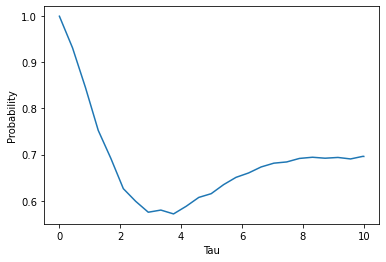

In [4]:
t0= 0
y0= der.array_maker(ym0)
t0= 0
dt0=  0.01/np.max(np.abs(der.f(y0,y0,p)))
N_step = 100              
dN = 100
tau_final=10
t_final = tau_final*2*2.2*T/dm2


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

prob_ve= der.probability(ym0, Eval, t, y)
tau= (dm2/(2*2.2*T))*t

plt.figure()
plt.plot(tau, prob_ve)
plt.xlabel("Tau")
plt.ylabel("Probability")
plt.show()